In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# URLs to the datasets
url_cleveland = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
url_hungary = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
url_va = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

# Column names for the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load datasets
df_cleveland = pd.read_csv(url_cleveland, header=None, names=column_names, na_values='?')
df_hungary = pd.read_csv(url_hungary, header=None, names=column_names, na_values='?')
df_va = pd.read_csv(url_va, header=None, names=column_names, na_values='?')

# Concatenate datasets
df_combined = pd.concat([df_cleveland, df_hungary, df_va], axis=0)

In [3]:
# Display basic information about the combined dataset
print("Combined Dataset Information:")
print(df_combined.info())
print("\nCombined Dataset Head:")
print(df_combined.head())

# Exploratory Data Analysis (EDA)
# Descriptive statistics for the combined dataset
print("\nDescriptive Statistics for Combined Dataset:")
print(df_combined.describe())

Combined Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       797 non-null    float64
 1   sex       797 non-null    float64
 2   cp        797 non-null    float64
 3   trestbps  740 non-null    float64
 4   chol      767 non-null    float64
 5   fbs       782 non-null    float64
 6   restecg   796 non-null    float64
 7   thalach   743 non-null    float64
 8   exang     743 non-null    float64
 9   oldpeak   741 non-null    float64
 10  slope     505 non-null    float64
 11  ca        304 non-null    float64
 12  thal      363 non-null    float64
 13  target    797 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 93.4 KB
None

Combined Dataset Head:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.

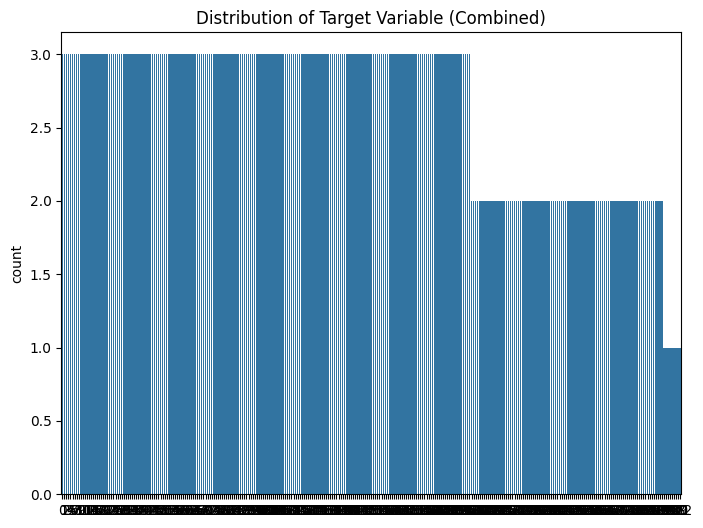

In [4]:
# Distribution of target variable for the combined dataset
plt.figure(figsize=(8, 6))
sns.countplot(df_combined['target'])
plt.title('Distribution of Target Variable (Combined)')
plt.show()



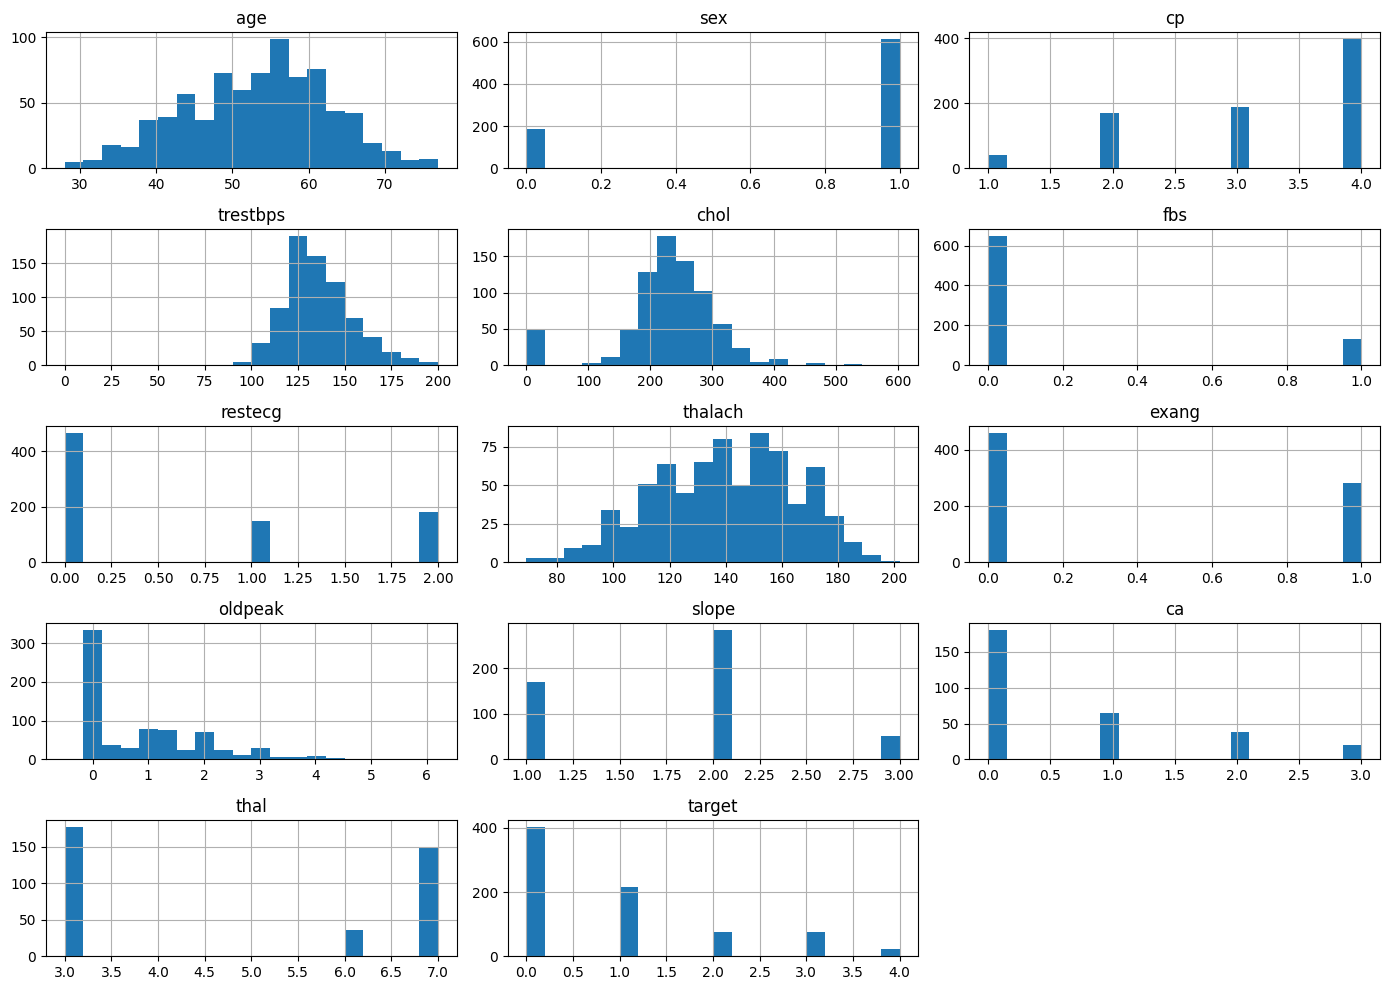

In [5]:
# Distribution of numerical features for the combined dataset
df_combined.hist(bins=20, figsize=(14, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

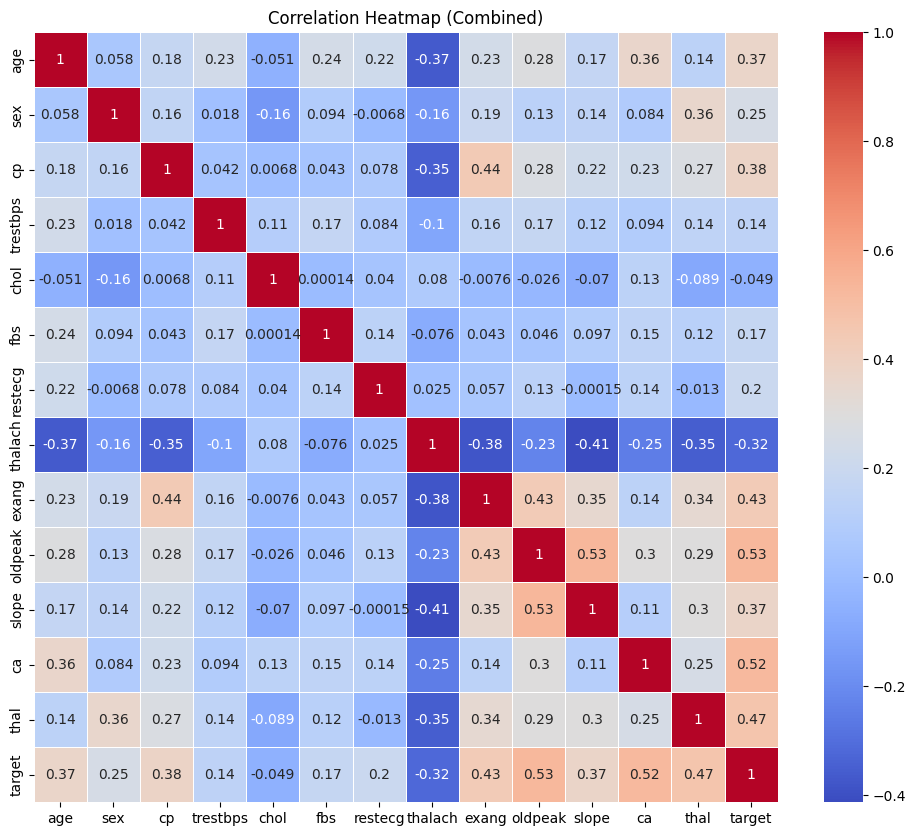

In [6]:
# Correlation heatmap for the combined dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Combined)')
plt.show()



In [16]:
# Handle missing values
df_combined = df_combined.dropna()

# Convert categorical variables to numeric if needed (e.g., sex, fbs, restecg, exang, slope, ca, thal)
df_combined['sex'] = df_combined['sex'].map({1: 1, 0: 0})
df_combined['fbs'] = df_combined['fbs'].map({1: 1, 0: 0})
df_combined['restecg'] = df_combined['restecg'].map({0: 0, 1: 1, 2: 2})
df_combined['exang'] = df_combined['exang'].map({1: 1, 0: 0})
df_combined['slope'] = df_combined['slope'].map({1: 1, 2: 2, 3: 3})
df_combined['ca'] = df_combined['ca'].map({0: 0, 1: 1, 2: 2, 3: 3})
df_combined['thal'] = df_combined['thal'].map({3: 3, 6: 6, 7: 7})

# === Target Mapping for Binary Classification ===
# Convert target into binary:
# 0 -> 0 (no disease)
# 1, 2, 3, 4 -> 1 (presence of heart disease)
df_combined['target'] = df_combined['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Define features and target
X = df_combined.drop('target', axis=1)
y = df_combined['target']



In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [18]:
# === Evaluation of the Binary Classification Model ===
print("\nConfusion Matrix (Binary):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Binary):")
print(classification_report(y_test, y_pred))


# Bias Detection: Analyze performance by sex
df_combined['predicted'] = model.predict(scaler.transform(X))

print("\nBias Detection Analysis (Binary by Sex):")
print(df_combined.groupby('sex').apply(lambda x: classification_report(x['target'], x['predicted'], output_dict=True)))

# Bias Mitigation: Simple example of balancing the dataset
# Separate by sex
df_male = df_combined[df_combined['sex'] == 1]
df_female = df_combined[df_combined['sex'] == 0]



Confusion Matrix (Binary):
[[41  8]
 [ 9 32]]

Classification Report (Binary):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.80      0.78      0.79        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90


Bias Detection Analysis (Binary by Sex):
sex
0    {'0': {'precision': 0.9859154929577465, 'recal...
1    {'0': {'precision': 0.9111111111111111, 'recal...
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\937707570.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df_combined.groupby('sex').apply(lambda x: classification_report(x['target'], x['predicted'], output_dict=True)))


In [19]:
# Balance the classes in each sex group
df_male_balanced = df_male.groupby('target').apply(lambda x: x.sample(df_male['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
df_female_balanced = df_female.groupby('target').apply(lambda x: x.sample(df_female['target'].value_counts().min(), random_state=42)).reset_index(drop=True)

# Combine the balanced datasets
df_balanced = pd.concat([df_male_balanced, df_female_balanced], axis=0)

# Re-train model with balanced data
X_balanced = df_balanced.drop(['target', 'sex', 'predicted'], axis=1)
y_balanced = df_balanced['target']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Standardize the balanced features
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test_balanced = scaler.transform(X_test_balanced)

# Train Random Forest Classifier on balanced data
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the model with balanced data
y_pred_balanced = model_balanced.predict(X_test_balanced)



C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\2862877864.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_male_balanced = df_male.groupby('target').apply(lambda x: x.sample(df_male['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\2862877864.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_female_balanced = df_female.grou

In [20]:
print("\nConfusion Matrix with Balanced Data (Binary):")
print(confusion_matrix(y_test_balanced, y_pred_balanced))

print("\nClassification Report with Balanced Data (Binary):")
print(classification_report(y_test_balanced, y_pred_balanced))


Confusion Matrix with Balanced Data (Binary):
[[25  7]
 [10 27]]

Classification Report with Balanced Data (Binary):
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.79      0.73      0.76        37

    accuracy                           0.75        69
   macro avg       0.75      0.76      0.75        69
weighted avg       0.76      0.75      0.75        69



In [8]:
# Split the data into training and testing sets for the combined dataset
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

# Train a Random Forest Classifier on the combined dataset
model_combined = RandomForestClassifier(n_estimators=100, random_state=42)
model_combined.fit(X_train_combined, y_train_combined)

# Make predictions for the combined dataset
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model for the combined dataset
print("\nConfusion Matrix (Combined Dataset):")
print(confusion_matrix(y_test_combined, y_pred_combined))
print("\nClassification Report (Combined Dataset):")
print(classification_report(y_test_combined, y_pred_combined))


Confusion Matrix (Combined Dataset):
[[41  8]
 [ 9 32]]

Classification Report (Combined Dataset):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.80      0.78      0.79        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



# Balanced data with Multiclass target

In [9]:
# Bias Detection Analysis on Combined Dataset (by sex)
df_combined['predicted'] = model_combined.predict(scaler.transform(X_combined))
print("\nBias Detection Analysis (Combined Dataset):")
print(df_combined.groupby('sex').apply(lambda x: classification_report(x['target'], x['predicted'], output_dict=True)))


Bias Detection Analysis (Combined Dataset):
sex
0    {'0': {'precision': 0.9859154929577465, 'recal...
1    {'0': {'precision': 0.9111111111111111, 'recal...
dtype: object


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [10]:
# Bias Mitigation: Balancing the dataset (by sex)
df_male_combined = df_combined[df_combined['sex'] == 1]
df_female_combined = df_combined[df_combined['sex'] == 0]

df_male_balanced_combined = df_male_combined.groupby('target').apply(lambda x: x.sample(df_male_combined['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
df_female_balanced_combined = df_female_combined.groupby('target').apply(lambda x: x.sample(df_female_combined['target'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_balanced_combined = pd.concat([df_male_balanced_combined, df_female_balanced_combined], axis=0)

# Re-train the model with balanced data for the combined dataset
X_balanced_combined = df_balanced_combined.drop(['target', 'sex', 'predicted'], axis=1)
y_balanced_combined = df_balanced_combined['target']
X_train_balanced_combined, X_test_balanced_combined, y_train_balanced_combined, y_test_balanced_combined = train_test_split(X_balanced_combined, y_balanced_combined, test_size=0.3, random_state=42)

X_train_balanced_combined = scaler.fit_transform(X_train_balanced_combined)
X_test_balanced_combined = scaler.transform(X_test_balanced_combined)

model_balanced_combined = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced_combined.fit(X_train_balanced_combined, y_train_balanced_combined)



C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\2810491183.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_male_balanced_combined = df_male_combined.groupby('target').apply(lambda x: x.sample(df_male_combined['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\2810491183.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_femal

RandomForestClassifier(random_state=42)


Confusion Matrix with Balanced Data (Combined Dataset):
[[2 2 1 0 0]
 [0 1 2 0 1]
 [0 0 0 2 1]
 [0 1 0 2 2]
 [0 0 0 1 2]]

Classification Report with Balanced Data (Combined Dataset):
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         3
           3       0.40      0.40      0.40         5
           4       0.33      0.67      0.44         3

    accuracy                           0.35        20
   macro avg       0.40      0.34      0.33        20
weighted avg       0.45      0.35      0.36        20



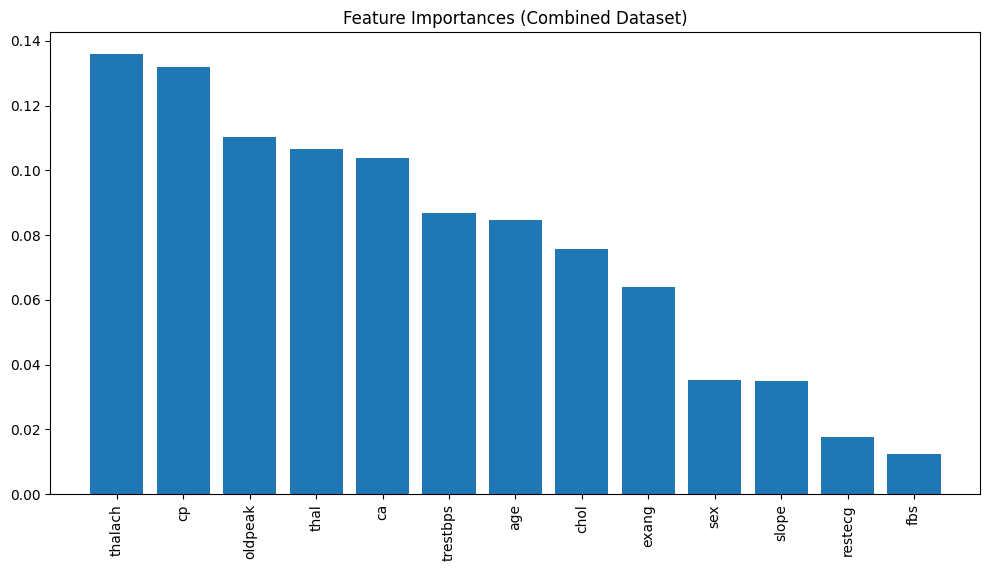

In [11]:
# Evaluate the model with balanced data for the combined dataset
y_pred_balanced_combined = model_balanced_combined.predict(X_test_balanced_combined)
print("\nConfusion Matrix with Balanced Data (Combined Dataset):")
print(confusion_matrix(y_test_balanced_combined, y_pred_balanced_combined))
print("\nClassification Report with Balanced Data (Combined Dataset):")
print(classification_report(y_test_balanced_combined, y_pred_balanced_combined))

# Feature importances for the combined dataset
features_combined = X_combined.columns
importances_combined = model_combined.feature_importances_
indices_combined = np.argsort(importances_combined)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Combined Dataset)')
plt.bar(range(X_combined.shape[1]), importances_combined[indices_combined], align='center')
plt.xticks(range(X_combined.shape[1]), [features_combined[i] for i in indices_combined], rotation=90)
plt.xlim([-1, X_combined.shape[1]])
plt.show()


# Combined

In [15]:
# Convert categorical variables to numeric if needed
df_combined['sex'] = df_combined['sex'].map({1: 1, 0: 0})
df_combined['fbs'] = df_combined['fbs'].map({1: 1, 0: 0})
df_combined['restecg'] = df_combined['restecg'].map({0: 0, 1: 1, 2: 2})
df_combined['exang'] = df_combined['exang'].map({1: 1, 0: 0})
df_combined['slope'] = df_combined['slope'].map({1: 1, 2: 2, 3: 3})
df_combined['ca'] = df_combined['ca'].map({0: 0, 1: 1, 2: 2, 3: 3})
df_combined['thal'] = df_combined['thal'].map({3: 3, 6: 6, 7: 7})

# Binary classification: Convert target to 0 and 1
df_combined['target'] = df_combined['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Unbalanced Dataset
X = df_combined.drop('target', axis=1)
y = df_combined['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier (Unbalanced)
model_unbalanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_unbalanced.fit(X_train, y_train)

# Make predictions on the unbalanced dataset
y_pred_unbalanced = model_unbalanced.predict(X_test)

# Confusion Matrix and Classification Report for Unbalanced Data
print("=== Unbalanced Dataset ===")
print("\nConfusion Matrix (Unbalanced):")
print(confusion_matrix(y_test, y_pred_unbalanced))
print("\nClassification Report (Unbalanced):")
print(classification_report(y_test, y_pred_unbalanced))
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
print(f"Accuracy (Unbalanced): {accuracy_unbalanced:.4f}")

# Bias Mitigation: Balancing the dataset
df_male = df_combined[df_combined['sex'] == 1]
df_female = df_combined[df_combined['sex'] == 0]

# Balance the classes in each sex group
df_male_balanced = df_male.groupby('target').apply(lambda x: x.sample(df_male['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
df_female_balanced = df_female.groupby('target').apply(lambda x: x.sample(df_female['target'].value_counts().min(), random_state=42)).reset_index(drop=True)

# Combine the balanced datasets
df_balanced = pd.concat([df_male_balanced, df_female_balanced], axis=0)

# Balanced Dataset
X_balanced = df_balanced.drop('target', axis=1)
y_balanced = df_balanced['target']

# Split the data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Standardize features
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test_balanced = scaler.transform(X_test_balanced)

# Train a Random Forest Classifier (Balanced)
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the balanced dataset
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Confusion Matrix and Classification Report for Balanced Data
print("\n=== Balanced Dataset ===")
print("\nConfusion Matrix (Balanced):")
print(confusion_matrix(y_test_balanced, y_pred_balanced))
print("\nClassification Report (Balanced):")
print(classification_report(y_test_balanced, y_pred_balanced))
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
print(f"Accuracy (Balanced): {accuracy_balanced:.4f}")

# Comparison of performance metrics
print("\n=== Performance Comparison ===")
print(f"Accuracy Unbalanced: {accuracy_unbalanced:.4f}")
print(f"Accuracy Balanced  : {accuracy_balanced:.4f}")

# Compare performance on each metric (e.g., Precision, Recall, F1-Score) using classification report

=== Unbalanced Dataset ===

Confusion Matrix (Unbalanced):
[[41  8]
 [ 9 32]]

Classification Report (Unbalanced):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.80      0.78      0.79        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

Accuracy (Unbalanced): 0.8111


C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\4050898141.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_male_balanced = df_male.groupby('target').apply(lambda x: x.sample(df_male['target'].value_counts().min(), random_state=42)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_32072\4050898141.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_female_balanced = df_female.gr


=== Balanced Dataset ===

Confusion Matrix (Balanced):
[[29  3]
 [ 3 34]]

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.92      0.92      0.92        37

    accuracy                           0.91        69
   macro avg       0.91      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69

Accuracy (Balanced): 0.9130

=== Performance Comparison ===
Accuracy Unbalanced: 0.8111
Accuracy Balanced  : 0.9130
